Предположим, мы написали программу. Она даже запустилась и вроде даже что-то сделала. Но в один прекрасный момент всё вылетело, а в терминале вылезло непонятное сообщение:

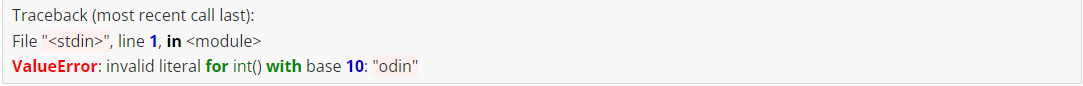

Ваша реакция:

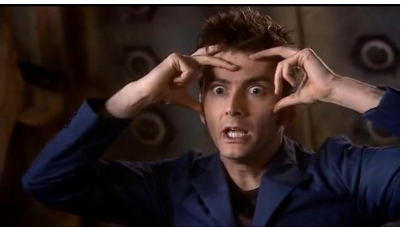

Эта ошибка относится к типу исключительных ситуаций. Исключительные ситуации порой возникают в случаях, когда вы написали код правильно, он запустился и отработал своё, а запустив код на следующий день, вы видите ошибку. 

Но как? В прошлый раз всё ведь запускалось без ошибок…

Дело в том, что исключения могут возникнуть не только из-за ошибок в написании кода, а ещё и от взаимодействия пользователя с вашей программой, от состояния системы, на которой она запущена, погоды или ретроградного Меркурия. Да от чего угодно помимо вашего кода! 

Итак, в этом юните вы узнаете, как работать с исключительными ситуациями или же исключениями в языке Python.

### Исключения — это такие ошибки, которые возникают не во время компиляции программы, а в процессе её исполнения, в случаях, если что-то идёт не так.

После возникновения исключения программа попытается экстренно завершить работу или перейти к обработчику исключения, если такой есть. Поскольку Python — интерпретируемый язык, то, по сути, исключения и вставляют нам палки в колёса, прерывая выполнение программы.

Ошибки бывают двух видов:

- отлавливаемые — все, что наследуются от класса Exception;
- не отлавливаемые — SystemExit, KeyboardInterrupt и т. д

Заучивать их все не стоит — только зря потратите время, потому как на самом деле этих ошибок может быть множество. Например, в отдельной библиотеке есть собственные исключения.

Давайте же посмотрим на пример кода, который вызывает исключение.

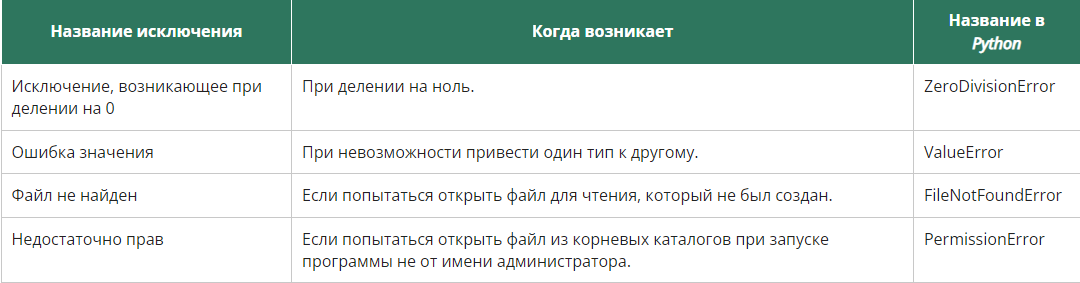

Это лишь несколько из них. [Список всех исключений](https://docs.python.org/3/library/exceptions.html) доступен в документации. Можете ознакомиться с ним, чтобы быть в курсе, какие ошибки могут возникнуть в простых программах.

In [1]:
print("Перед исключением")
c = 1 / 0  # Здесь что-то не так….
print("После исключения")

Перед исключением


ZeroDivisionError: division by zero

В консоли мы увидим следующий результат:

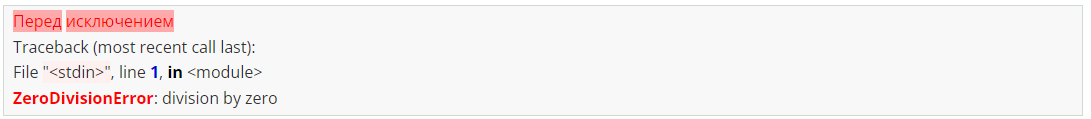

Строка «После исключения» не будет выведена на экран: как только интерпретатор дойдёт до строчки c = 1 / 0, он экстренно завершит работу и выведет нам сообщение об ошибке деления на ноль.

В этом примере мы чётко видим, что может возникнуть ошибка. Но в большинстве случаев это бывает не столь очевидно. Поэтому давайте слегка поменяем наш код:

In [3]:
print("Перед исключением")
# теперь пользователь сам вводит числа для деления
a = int(input("a: "))
b = int(input("b: "))
c = a / b  # здесь может возникнуть исключение деления на ноль
print(c)  # печатаем c = a / b если всё хорошо
print("После исключения")

Перед исключением


ZeroDivisionError: division by zero

После выполнения этого кода у пользователя может возникнуть такая же ошибка, если он введёт b = 0.

?
Как же сделать так, чтобы программа не вылетала при ошибке и продолжала свою работу? 

Очень просто! Для этого и нужна конструкция try-except.

Давайте посмотрим на следующий код:

In [4]:
try:  # Добавляем конструкцию try-except для отлова нашей ошибки
    print("Перед исключением")
    # теперь пользователь сам вводит числа для деления
    a = int(input("a: "))
    b = int(input("b: "))
    c = a / b  # здесь может возникнуть исключение деления на ноль
    print(c)  # печатаем c = a / b если всё хорошо
except ZeroDivisionError as e: # Добавляем тип именно той ошибки, которую хотим отловить.     
    print(e)  # Выводим информацию об ошибке
    print("После исключения")
 
print("После После исключения")

Перед исключением
division by zero
После исключения
После После исключения


В данном случае тоже может возникнуть ошибка деления на ноль, если пользователь введёт b = 0. Поэтому мы отлавливаем ошибку ZeroDivisionError. В блоке try помещается «опасный» кусок кода, который может вызывать исключения, а в блоке except указывается класс ошибки, которую мы хотим отловить, а затем помещается код, который нужно выполнить в случае возникновении ошибки. 

После возникновении ошибки код в блоке try прервётся, перейдёт в блок except, а затем продолжит выполняться дальше — программа не вылетает, как это было без обработчика исключений. В этом и есть главная суть конструкции try-except.

Это ещё не всё! Есть также блоки finally и else. Код в блоке else выполнялся после завершения цикла. С try-except есть нечто похожее. Посмотрите на пример кода ниже.

Можно так:

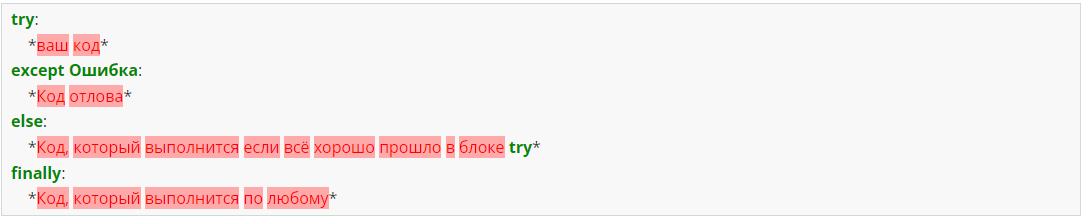

Важно! Обратите внимание на отступы — код внутри конструкции сдвинут на второй уровень вложенности.

Рассмотрим применение этих блоков на примере:

In [5]:
try:
    print("Перед исключением")
    a = int(input("a: "))
    b = int(input("b: "))
    c = a / b
    print(c)  # печатаем c = a / b если всё хорошо
except ZeroDivisionError as e:
    print("После исключения")
else:  # код в блоке else выполняется только в том случае, если код в блоке try выполнился успешно (т.е. не вылетело никакого исключения).
    print("Всё ништяк")
finally:  # код в блоке finally выполнится в любом случае, при выходе из try-except
    print("Finally на месте")
 
print("После После исключения")

Перед исключением
После исключения
Finally на месте
После После исключения


Здесь результат работы программы будет зависеть от ввода пользователя. Если пользователь введёт всё правильно, то он должен увидеть следующее:

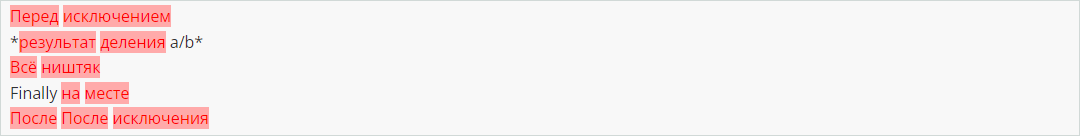

Если же возникнет ошибка, то пользователь увидит следующее:

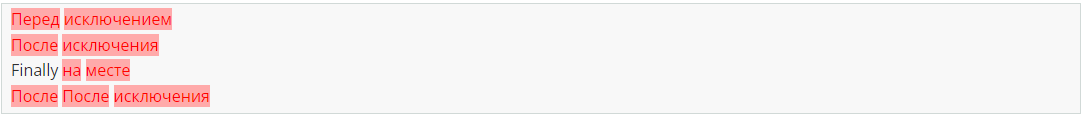

Код в блоке else не выполнится, поскольку было исключение, а код в блоке finally выполняется в обоих случаях.

Конечно, мы можем вызывать ошибки самостоятельно с помощью конструкции raise. Используется это, как правило, для отладки кода и остановки программы в критических ситуациях.

Например:

In [6]:
age = int(input("Сколько тебе лет?"))

 
if age > 100 or age <= 0:
    raise ValueError("Тебе не может быть столько лет")
 
print(f"Тебе {age} лет!") # Возраст выводится только если пользователь ввёл правильный возраст.

ValueError: Тебе не может быть столько лет

Здесь ошибка ValueError возникнет, если пользователь ввёл неправильный возраст, и остановит работу программы, выдав в консоль:
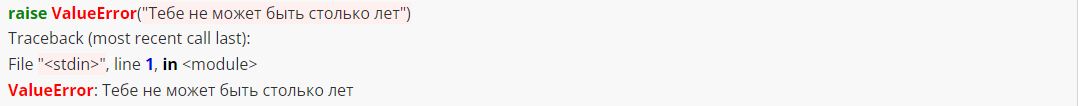

В консоль выводится именно то сообщение, которое вы передадите в аргумент конструктора класса исключения. Если не хотите никаких сообщений, то просто оставьте скобки пустыми. 

Стоит отметить, что отлавливать вызываемые с помощью raise ошибки тоже можно.

## Давайте кратко подведём итоги:

1. Исключения — это ошибки, которые выбрасываются при неправильной работе программы, и останавливают её выполнение, если они не обработаны.

2. Конструкция try-except выглядит следующим образом и служит для обработки исключений:
try:
    *код, который может вызвать ту или иную ошибку*
except *ошибка*:
    *код, который выполнится в случае возникновения ошибки*
else:
    *код, который выполнится только в случае если в try ничего не сломалось*
finally:
    *код, который выполнится по любому*

    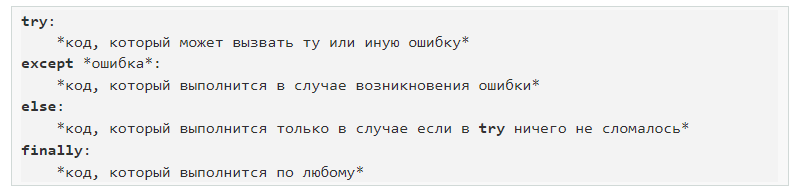
    
3. Блоки finally и else являются не обязательными, но могут быть использованы для вашего удобства. Код из блока finally выполняется в любом случае, независимо от исхода в блоках try-except. Код из блока else выполняется только в случае успешного выполнения кода в try.
4. Выбрасывать ошибки можно и по своему желанию с помощью конструкции raise *Тип ошибки* (сообщение, которое нужно вывести в консоль).

### Задание 8.7
Задание на самопроверку.

Создать скрипт, который будет в input() принимать строки, и их необходимо будет конвертировать в числа, добавить try-except на то, чтобы строки могли быть сконвертированы в числа.

В случае удачного выполнения скрипта написать: «Вы ввели <введённое число>».

В конце скрипта обязательно написать: «Выход из программы».

ПРИМЕЧАНИЕ: Для отлова ошибок используйте try-except, а также блоки finally и else.

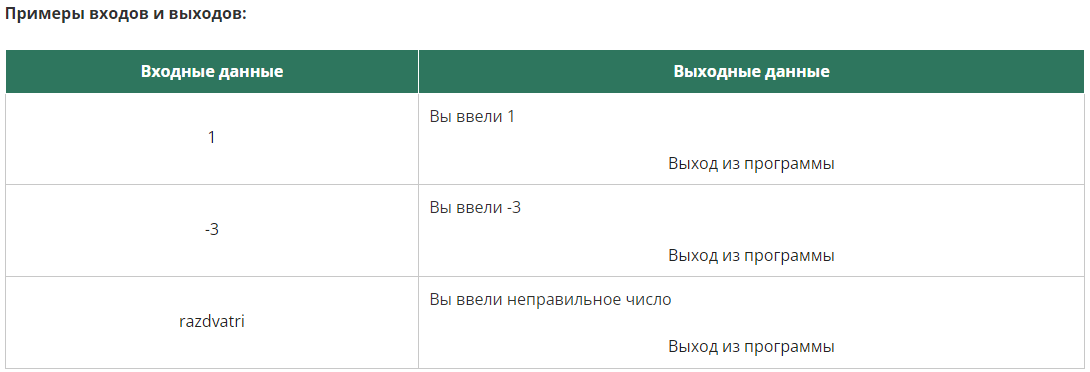

In [9]:
try:
    i = int(input('Введите число:\t'))
except ValueError as e:
    print('Вы ввели неправильное число')
else:
    print(f'Вы ввели {i}')
finally:
    print('Выход из программы')

Вы ввели неправильное число
Выход из программы
